<a href="https://colab.research.google.com/github/AverYuchen/myFitRoom/blob/main/notebooks/full_body_top.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Set up environment

In [2]:
%cd /content/drive/MyDrive/Experiment_AI_Final_Project/OOTDiffusion

/content/drive/.shortcut-targets-by-id/1J1aU0RBc-zH-KjIQ7nBmkEfzWWfVDQhb/Experiment_AI_Final_Project/OOTDiffusion


In [3]:
!pip install torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 112.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 105.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 117.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 95.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
!pip show huggingface_hub

Name: huggingface-hub
Version: 0.19.4
Summary: Client library to download and publish models, datasets and other repos on the huggingface.co hub
Home-page: https://github.com/huggingface/huggingface_hub
Author: Hugging Face, Inc.
Author-email: julien@huggingface.co
License: Apache
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, fsspec, packaging, pyyaml, requests, tqdm, typing-extensions
Required-by: accelerate, diffusers, gradio, gradio_client, peft, sentence-transformers, timm, tokenizers, transformers


In [3]:
!pip show diffusers

Name: diffusers
Version: 0.24.0
Summary: State-of-the-art diffusion in PyTorch and JAX.
Home-page: https://github.com/huggingface/diffusers
Author: The HuggingFace team
Author-email: patrick@huggingface.co
License: Apache
Location: /usr/local/lib/python3.10/dist-packages
Requires: filelock, huggingface-hub, importlib-metadata, numpy, Pillow, regex, requests, safetensors
Required-by: 


In [4]:
!pip show peft

Name: peft
Version: 0.7.0
Summary: Parameter-Efficient Fine-Tuning (PEFT)
Home-page: https://github.com/huggingface/peft
Author: The HuggingFace team
Author-email: sourab@huggingface.co
License: Apache
Location: /usr/local/lib/python3.10/dist-packages
Requires: accelerate, huggingface-hub, numpy, packaging, psutil, pyyaml, safetensors, torch, tqdm, transformers
Required-by: 


In [7]:
# !pip uninstall -y peft huggingface-hub diffusers
# # !pip uninstall -y peft huggingface-hub

# !pip install huggingface-hub==0.19.4
# !pip install diffusers==0.24.0
# !pip install peft==0.7.0

# 2. OOTDiffusion: full body top
* cloth: 050002_1.jpg
* model: 049447_0.jpg


## 2.1 Show cloth and model images

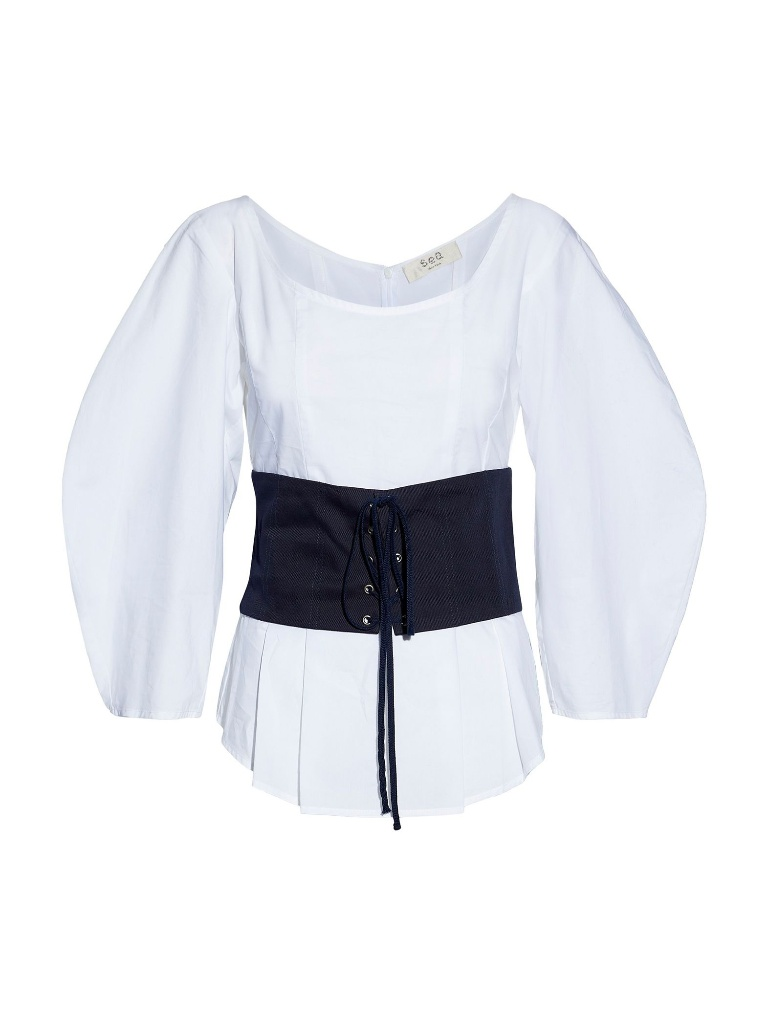

In [25]:
from PIL import Image
cloth_img = Image.open('/content/drive/MyDrive/Experiment_AI_Final_Project/OOTDiffusion/run/examples/garment/049940_1.jpg')
model_img = Image.open('/content/drive/MyDrive/Experiment_AI_Final_Project/OOTDiffusion/run/examples/model/049713_0.jpg')

display(cloth_img)

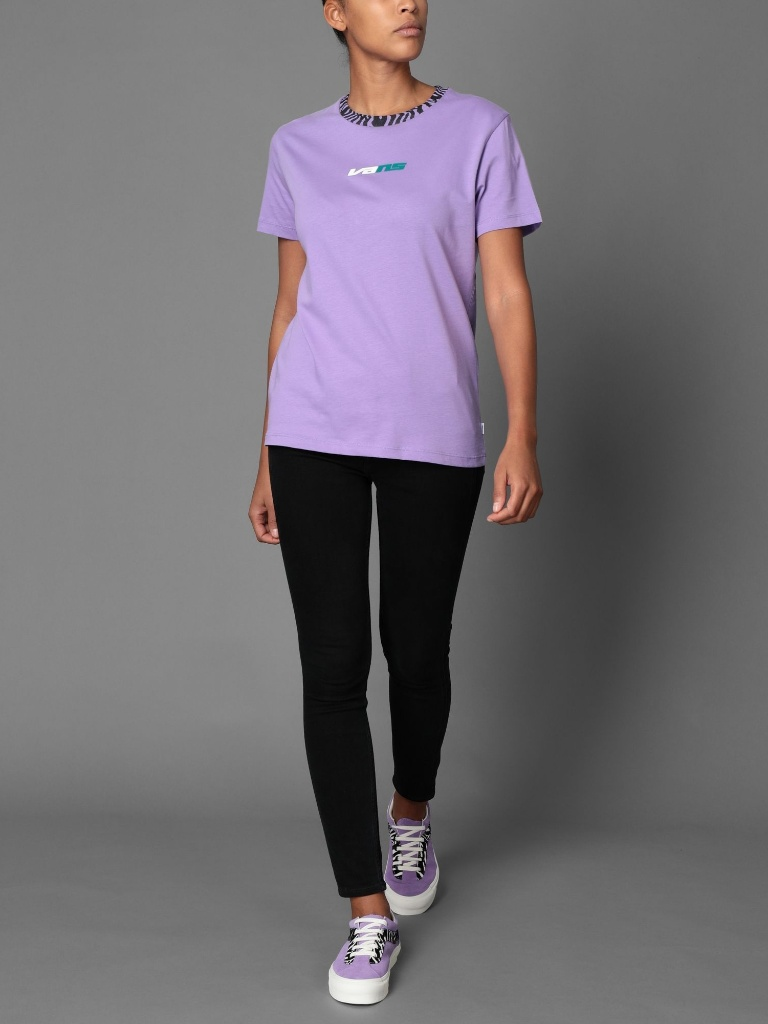

In [26]:
display(model_img)

## 2.2 Virtual try-on

In [7]:
%cd run

/content/drive/.shortcut-targets-by-id/1J1aU0RBc-zH-KjIQ7nBmkEfzWWfVDQhb/Experiment_AI_Final_Project/OOTDiffusion/run


In [8]:
import torch
torch.cuda.empty_cache()

In [27]:
!python run_ootd.py --model_path /content/drive/MyDrive/Experiment_AI_Final_Project/OOTDiffusion/run/examples/model/049713_0.jpg  --cloth_path /content/drive/MyDrive/Experiment_AI_Final_Project/OOTDiffusion/run/examples/garment/049940_1.jpg --model_type dc --category 0 --scale 2.0 --sample 4 --save fullBodyTop

2024-12-12 19:47:26.343637: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-12 19:47:26.364756: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-12 19:47:26.371160: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-12 19:47:27.577585: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Loading pipeline components...: 100% 7/7 [00:01<00:00,  5.01it/s]
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which w

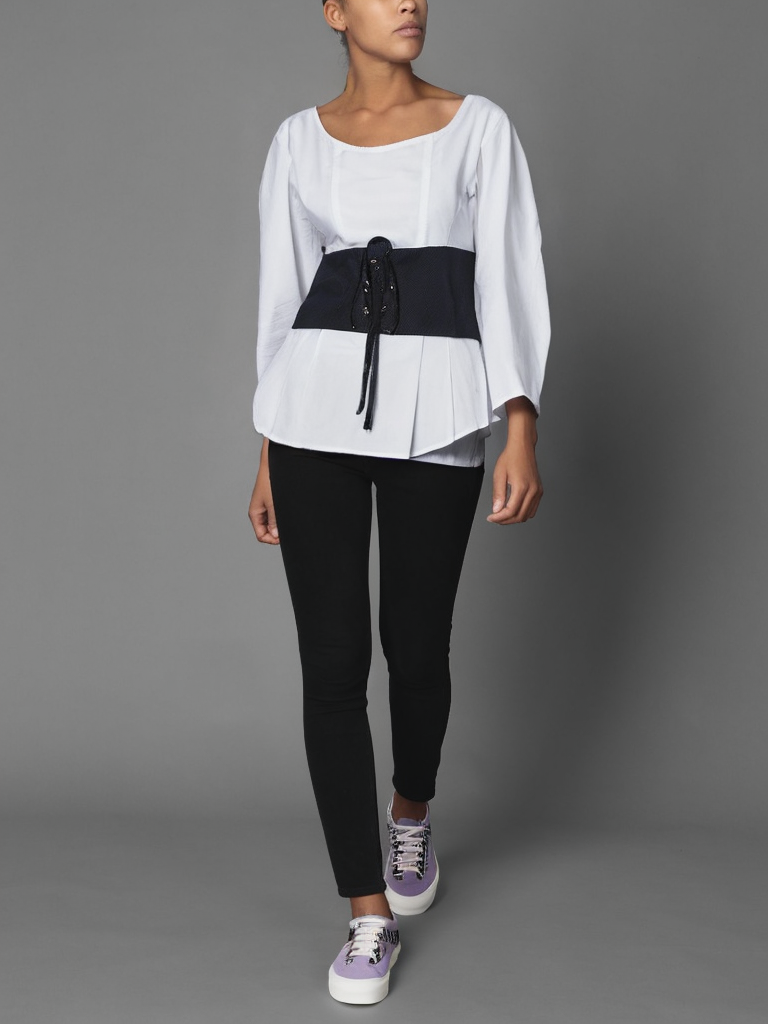

In [32]:
virtual_try_on_img = Image.open('/content/drive/MyDrive/Experiment_AI_Final_Project/OOTDiffusion/run/images_output/dc/fullBodyTop_out_dc_3.png')

display(virtual_try_on_img)